<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-FranciscoMedellin/blob/main/Actividad_Semanal_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 7 Regresiones
- Materia: Ciencia y Analítica de Datos.
- Nombre de la entrega: Actividad Semanal 7 Regresiones
- Fecha: 09/11/2022.
- Francisco Medellin Zertuche - A01794044.
- Profesor titular: María de la Paz Rico Fernández.
- Profesor tutor: Roberto Antonio Guevara González.

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [ ]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [ ]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

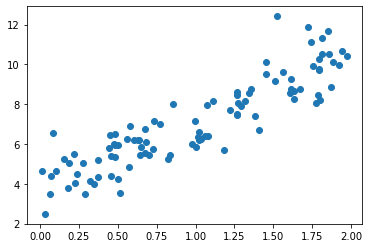

In [ ]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y)

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [ ]:
#X_fit[]

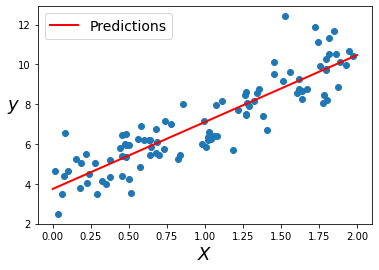

In [ ]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [ ]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [ ]:
X_new.shape

(2, 1)

In [ ]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [ ]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [ ]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [ ]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

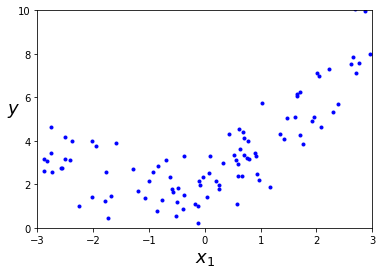

In [ ]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [ ]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.998940
1,4.320418
2,2.599923
3,2.175267
4,0.447174
...,...
95,0.565325
96,2.759217
97,3.314489
98,3.124415


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [ ]:
X_poly

array([[-2.38324557e+00,  5.67985946e+00],
       [ 4.25427011e-01,  1.80988142e-01],
       [-2.88979418e+00,  8.35091039e+00],
       [-1.05861711e-01,  1.12067018e-02],
       [-1.73790252e+00,  3.02030517e+00],
       [-9.23900594e-01,  8.53592308e-01],
       [ 1.65482841e+00,  2.73845708e+00],
       [ 2.64742503e+00,  7.00885927e+00],
       [-2.56550237e+00,  6.58180240e+00],
       [ 2.05453236e-01,  4.22110321e-02],
       [ 2.29520091e+00,  5.26794724e+00],
       [-2.50494879e+00,  6.27476846e+00],
       [ 1.94708428e+00,  3.79113720e+00],
       [-8.53191894e-01,  7.27936409e-01],
       [-1.06743179e+00,  1.13941062e+00],
       [ 2.86479832e+00,  8.20706940e+00],
       [-1.79484546e+00,  3.22147023e+00],
       [ 1.15916364e+00,  1.34366036e+00],
       [ 1.92864437e+00,  3.71966910e+00],
       [-2.75289903e+00,  7.57845306e+00],
       [ 1.02231275e+00,  1.04512336e+00],
       [ 2.70929985e+00,  7.34030566e+00],
       [-2.25468020e+00,  5.08358280e+00],
       [ 2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [ ]:
print(X[0])
print(X[0]*X[0])


[-2.38324557]
[5.67985946]


In [ ]:
X_poly[0]

array([-2.38324557,  5.67985946])

Fit the model to this extended training data:

In [ ]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.89643337, 0.48819444]]), array([2.09460069]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

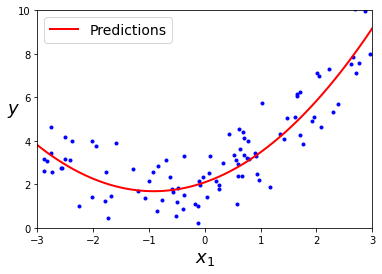

In [ ]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [6]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
635,4.950911,42.020070
797,5.536360,35.230730
403,4.142276,34.982691
628,4.934726,47.254788
4,1.298773,98.777013
901,6.124839,29.785536
519,4.510989,39.014060
931,6.476508,30.222178
95,2.761981,48.258282
818,5.618099,32.063596


In [2]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [3]:
len(X)

1000

In [4]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

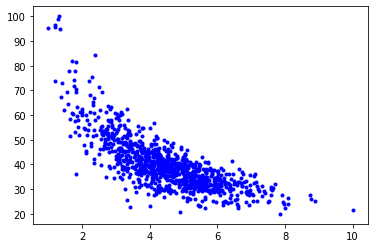

In [7]:
plt.plot(X,y,'b.')

**Lineal Regression:**

In [161]:
# Primero hacemos un split de los datos
from sklearn.model_selection import train_test_split
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.3,random_state=8)


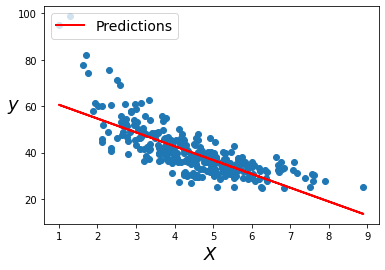

In [162]:
from sklearn.linear_model import LinearRegression

LR=LinearRegression()
LR.fit(X_tv,y_tv)
y_pred_lin=LR.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lin, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Encontremos los coeficientes de la funcion, y sus respectivos coeficientes de error como R2 y MAE.

In [163]:
from sklearn import metrics
from sklearn.metrics import r2_score

list_MAE=[]
list_R2=[]

mae=metrics.mean_absolute_error(y_test, y_pred_lin)
r2=r2_score(y_test, y_pred_lin)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lin))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin)))
print('r2_score',r2_score(y_test, y_pred_lin))

Error medio Absoluto (MAE): 4.850630520117253
Root Mean Squared Error: 6.833841737376273
r2_score 0.5798838950837469


In [164]:
# Coeficientes de la funcion
LR.coef_, LR.intercept_

(array([-5.95829066]), 66.57464345668173)

Funcion: <br>

${\hat{y}=-5.95x+66.57}$

**Regresion Polinomial**

In [165]:
# Slipt data
from sklearn.model_selection import train_test_split
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.3,random_state=6)

Error medio Absoluto (MAE): 10.09828878271694
Root Mean Squared Error: 13.679570444780149
r2_score -0.6809373225652562


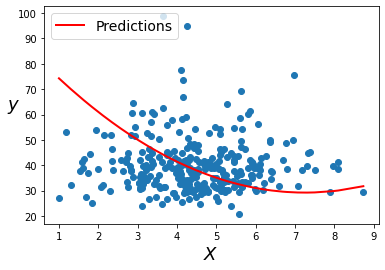

In [166]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(2)

X_test.values.sort(axis=0)
X_poly_train=poly.fit_transform(X_tv)
X_poly_test=poly.fit_transform(X_test)


LR=LinearRegression()
LR.fit(X_poly_train,y_tv)


y_pred =LR.predict(X_poly_test)

# Grafica
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

#Errors
mae=metrics.mean_absolute_error(y_test, y_pred)
r2=r2_score(y_test, y_pred)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score',r2)

Obetenemos los coeficientes del polinomio

In [84]:
LR.coef_, LR.intercept_

(array([  0.       , -16.7124535,   1.1512094]), 89.83936399769576)

${\hat{y}=-16.71x+1.15x^2+89.83}$

**Regresión con Ridge**

In [167]:
# Primero hacemos un split igual que en el pasado modelo polinomial
from sklearn.model_selection import train_test_split
X_tv,X_test,y_tv,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

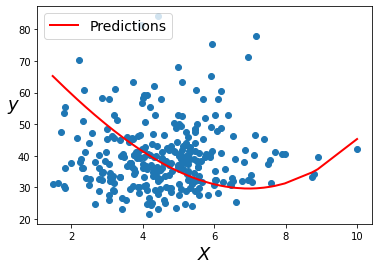

In [168]:
#ridge
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# reacomodar valores
X_test.values.sort(axis=0)

model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 6, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_tv, y_tv)


y_pred_r = model_ridge.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_r, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [169]:
# Errors
mae=metrics.mean_absolute_error(y_test, y_pred_r)
r2=r2_score(y_test, y_pred_r)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_r)))
print('r2_score',r2)

Error medio Absoluto (MAE): 9.856975023421832
Root Mean Squared Error: 13.1844295935827
r2_score -0.6612666814276205


Ahora encontremos los coeficientes dados con Ridge

In [148]:
model_ridge.named_steps['ridge'].coef_, model_ridge.named_steps['ridge'].intercept_

(array([-15.98364264,   2.8727073 ,   5.49054084]), 40.24691190134286)

${\hat{y}=-15.98x+2.87x^2+5.49x^3+40.24}$

**Regresion con Lasso**

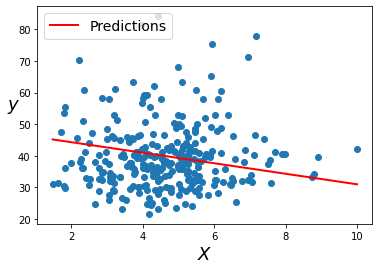

In [152]:
#lasso
from sklearn.linear_model import Lasso




model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("lasso", Lasso(alpha = 6, random_state = 42))])
model_lasso.fit(X_tv, y_tv)


y_pred_lasso = model_lasso.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

Podemos ver como incluso con el mismo alfa tenemos una penalizacion mas fuerte en el metodo de lasso. Esto tambien afectara a nuestros coeficientes de error. y nuestros coeficientes.

Cambiemos el valore de alfa.

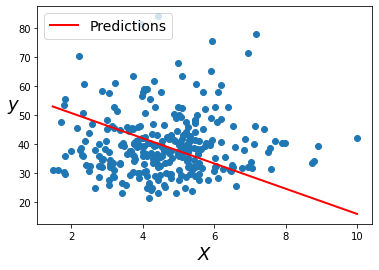

In [170]:
#lasso
from sklearn.linear_model import Lasso




model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("lasso", Lasso(alpha = 2.5, random_state = 42))])
model_lasso.fit(X_tv, y_tv)


y_pred_lasso = model_lasso.predict(X_test)

plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred_lasso, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [171]:
mae=metrics.mean_absolute_error(y_test, y_pred_lasso)
r2=r2_score(y_test, y_pred_lasso)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2)

Error medio Absoluto (MAE): 9.119137295391207
Root Mean Squared Error: 12.083950950937835
r2_score -0.3955152016898764


In [159]:
model_lasso.named_steps['lasso'].coef_, model_lasso.named_steps['lasso'].intercept_

(array([-5.67335058, -0.        , -0.        ]), 40.24691190134286)

${\hat{y}=-5.67x+40.24}$

### **Graficas de MAE y R2**<br>

Comparemos los diferentes errores de los modelos que hemos visto.

**MAE**

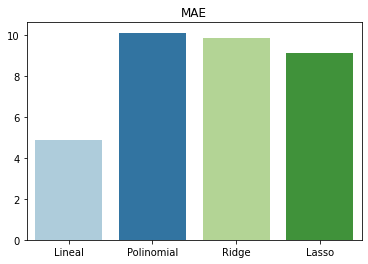

In [183]:
import seaborn as sns
sns.barplot(x=["Lineal","Polinomial","Ridge","Lasso"],y=list_MAE, palette="Paired")
plt.title("MAE")
plt.show()

**R2**

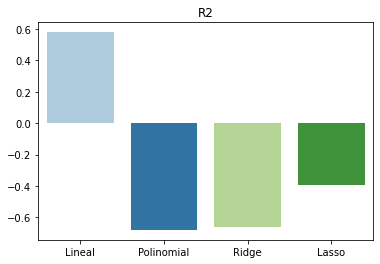

In [184]:
sns.barplot(x=["Lineal","Polinomial","Ridge","Lasso"],y=list_R2, palette="Paired")
plt.title("R2")
plt.show()

## **Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**<br>


En base a lo realizado durante este ejercisio primero necesitamos aclarar unos puntos en cuanto al comportamiento dado con los diferentes parametros que se configuraron para el entrenamiento y el test de los modelos.

Con lo anterior podemos ver como los modelos polinmial, ridge y con lasso tienen un R2 con valor negativo, lo cual da una imagen demasiado optimista del ajuste de regression en el entrenamiento. Siendo un fuerte indicador de posible sobreentrenamiento(overfitting).

Con el modelo lineal obtenemos un R2 de 0.6 y con un MAE de 4.5 dolares, muy lejano a los valores de 10 que obtenemos de los modelos polinomiales.

Dicho esto podemos decir que el mejor modelo para utilizar por la empresa es el modelo lineal con  el R2 y MAE mas aceptables. En el caso del MAE lineal de 4.5 dolares esta por debajo de la STD de nuestro data set de 10 dolares.
El modelo lineal es el que tiene mejores valores de MAE y de R2 para una posible implementacion.



#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [185]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
735,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,...,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
2830,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,...,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
4106,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,...,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
16218,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,...,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
19964,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,...,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050
1227,1761300310,20140827T000000,211000.0,4,2.00,1710,8288,1.5,0,0,...,7,1710,0,1970,0,98031,47.3947,-122.174,1710,7200
18849,7732410120,20140819T000000,790000.0,4,2.50,2690,8036,2.0,0,0,...,9,2690,0,1987,0,98007,47.6596,-122.144,2420,8087
19369,7010701383,20141017T000000,680000.0,3,2.50,1800,4400,1.0,0,0,...,7,1350,450,1970,0,98199,47.6599,-122.396,1920,4400
20164,291310170,20140804T000000,384500.0,3,2.50,1600,2610,2.0,0,0,...,8,1600,0,2005,0,98027,47.5344,-122.068,1445,1288
7139,4232901990,20140516T000000,605000.0,2,1.00,910,3600,1.0,0,0,...,7,910,0,1909,0,98119,47.6341,-122.361,1720,3600


In [186]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [187]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [188]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


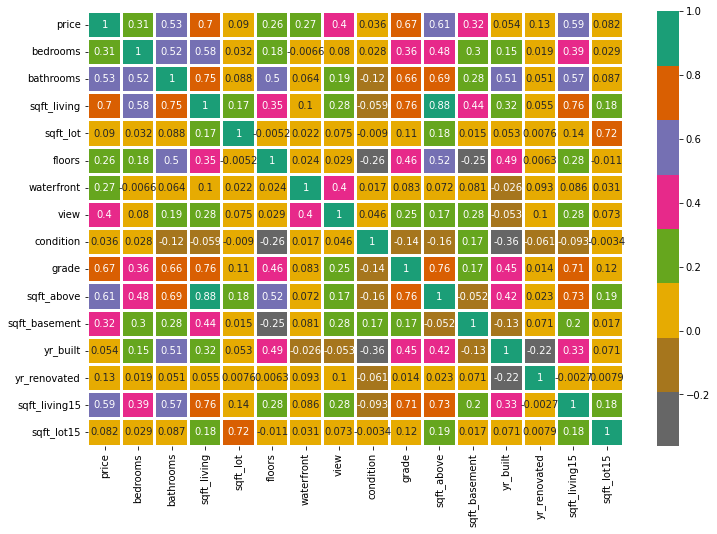

In [189]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [190]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [191]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


## Regresión Múltiple Lineal

In [237]:
#tu codigo aquí
from sklearn.linear_model import LinearRegression

# Crear Modelo
LR=LinearRegression()
LR.fit(X_train,y_train)
y_pred_lr = LR.predict(X_test)

# Coeficientes del modelo multiple lineal
print(LR.coef_,LR.intercept_)

[[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]] [6151359.2627409]


In [197]:
# veamos las columnas a las que pertenece cada coeficiente
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [236]:
# Listas de errores para cada modelo
list_MAE=[]
list_R2=[]

In [238]:
# Errores del modelo
mae=metrics.mean_absolute_error(y_test, y_pred_lr)
r2=r2_score(y_test, y_pred_lr)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred_lr))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr)))
print('r2_score',r2_score(y_test, y_pred_lr))

Error medio Absoluto (MAE): 137480.1388273178
Root Mean Squared Error: 232133.3676240749
r2_score 0.6579723205007814


## Regresión Múltiple Polinomial

In [239]:
from sklearn.preprocessing import PolynomialFeatures

poly=PolynomialFeatures(2)
X_poly=poly.fit_transform(X_train)
X_poly_test=poly.fit_transform(X_test)

LR.fit(X_poly,y_train)
y_pred_poly=LR.predict(X_poly_test)

In [207]:
# veamos los coeficientes de la ecuacion polinomial multiple
LR.coef_,LR.intercept_

(array([[-3.36215067e+02,  9.33786601e+05, -1.09276012e+06,
         -5.00000916e+02, -2.78655818e+01, -2.07431876e+06,
         -3.95454208e+06, -2.88626046e+05,  5.58593032e+05,
          1.09860635e+06, -1.76306376e+02, -3.38830099e+02,
         -8.59690742e+04, -2.95364696e+03,  3.99966813e+03,
         -3.40100969e+01,  9.57353093e+02,  7.49573773e+03,
         -1.43129923e+01, -1.86055609e-02,  8.57765264e+03,
         -1.15023978e+04, -3.07568695e+02, -5.24425041e+03,
         -5.36756662e+03, -6.90375101e-01, -1.40883136e+01,
         -4.67027049e+02, -9.12671559e+00,  1.72774587e+01,
          2.15692510e-01, -9.63018996e+03,  1.55434606e+01,
         -1.35758634e-01, -2.59069352e+04,  4.33710369e+04,
          3.82965496e+03, -1.07945148e+03,  2.22974058e+04,
          1.42714685e+01,  1.18111267e+00,  5.03113646e+02,
         -1.70855006e+01, -1.72874822e+01, -5.57330742e-02,
         -4.95300818e-01, -1.18373560e+00,  4.83455018e+00,
          1.60300634e+02, -1.42701954e+0

In [240]:
# errores
mae=metrics.mean_absolute_error(y_test, y_pred_poly)
r2=r2_score(y_test, y_pred_poly)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_poly)))
print('r2_score',r2)

Error medio Absoluto (MAE): 121313.19643053468
Root Mean Squared Error: 186263.02675855052
r2_score 0.7797887906321873


conclusion aumentando el grado del polinomio comenzamos a tener un peor r2 score.

## Implementacion con Ridge

In [241]:
from sklearn.linear_model import Ridge

# recordemos que ridge es menos estricto que lasso.
model_ridge = Pipeline([("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("ridge", Ridge(alpha = 6, solver = 'cholesky', random_state = 42))])
model_ridge.fit(X_train, y_train)


y_pred_ridge = model_ridge.predict(X_test)

Ecaucion con Ridge

In [213]:
model_ridge.named_steps['ridge'].coef_, model_ridge.named_steps['ridge'].intercept_

(array([[ 1.35418678e+05, -7.05164319e+03,  3.07306288e+04,
         -1.38966626e+05, -2.50652900e+04, -4.09167606e+04,
         -2.44511905e+04,  1.25184934e+05,  1.48070310e+05,
          1.07782604e+04,  4.34644074e+04, -1.40765590e+05,
         -7.91624324e+04,  2.36260232e+05, -7.00218005e+04,
          1.03689400e+04, -5.13995423e+03, -2.89092728e+04,
         -2.49106048e+04,  1.67368453e+04, -6.02553461e+03,
          5.79610428e+02, -2.63074093e+03, -3.90694682e+04,
         -2.09854872e+04, -2.86189926e+04, -1.35498255e+05,
         -1.39419624e+03,  6.01714484e+04,  2.28627489e+04,
         -4.49954890e+03,  5.35913533e+04,  5.57602755e+02,
         -4.54079275e+04,  1.35940716e+04,  9.72664177e+03,
         -4.55573206e+04,  1.34723920e+05,  6.36893381e+04,
         -2.65576435e+03,  1.08547624e+04, -2.45751575e+04,
         -8.24783465e+04,  6.17297939e+03,  1.13977119e+04,
         -3.19221736e+04,  1.66712111e+02,  3.79546804e+04,
         -2.73026160e+04,  2.83437997e+0

Errores

In [242]:
mae=metrics.mean_absolute_error(y_test, y_pred_ridge)
r2=r2_score(y_test, y_pred_ridge)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge)))
print('r2_score',r2)

Error medio Absoluto (MAE): 122306.43060755903
Root Mean Squared Error: 187955.56691223133
r2_score 0.7757685647693542


## Implementacion con Lasso

In [243]:
from sklearn.linear_model import Lasso

model_lasso = Pipeline([("poly_features", PolynomialFeatures(degree=3, include_bias=False)),
                  ("scaler", StandardScaler()),
                  ("lasso", Lasso(alpha = 0.8, random_state = 42))])
model_lasso.fit(X_train, y_train)


y_pred_lasso = model_lasso.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.920e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Errores

In [244]:
mae=metrics.mean_absolute_error(y_test, y_pred_lasso)
r2=r2_score(y_test, y_pred_lasso)

list_MAE.append(mae)
list_R2.append(r2)
print('Error medio Absoluto (MAE):', mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso)))
print('r2_score',r2)

Error medio Absoluto (MAE): 121655.15105932411
Root Mean Squared Error: 189525.59620430943
r2_score 0.7720068215238601


## **Analisis visual de errores mediante graficas**

**MAE**

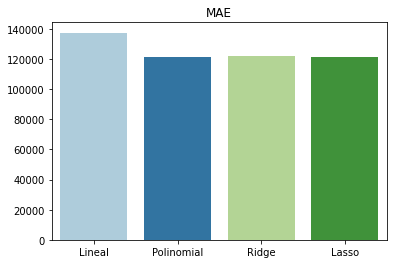

In [245]:
import seaborn as sns

sns.barplot(x=["Lineal","Polinomial","Ridge","Lasso"],y=list_MAE, palette="Paired")
plt.title("MAE")
plt.show()

**R2 Score**

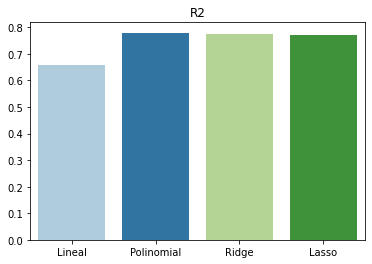

In [247]:
sns.barplot(x=["Lineal","Polinomial","Ridge","Lasso"], y=list_R2, palette="Paired")
plt.title("R2")
plt.show()

## **Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?**<br>

Para este caso de uso podemos visualizar que el modelo de regresion que mejore ajuste tiene son los polinomiales. Teniendo valores en sus metricas de error muy similares. Podemos notar que el R2 del polinomial es de 0.77 bastante cercano a 1 y deducimos que tiene un buen porcentaje de explicaion de la varianza de los datos. Por lo que tendremos que hacer uso del error MAE el cual tiene los siguientes valores para cada modelo:
- MPL: 121313.19643053468
- RIDGE: 122306.43060755903
- LASSO: 121655.15105932411

Podemos como el modelo polinomial multiple es el que tiene un MAE mas bajo y un R2 score bastente aceptable. Con esto concluimos que este es el mejor modelo a escoger.



## Conclusiones


La realizacion de estos ejercisios nos permite ver que no siempre los modelos polinomiales son mejores que los lineales y que es necesario conocer el comportamiento de los parametros de entrenamiento,spliting y de penalizacion ya que tendran un impacto considerable en el modelo
- Podemos ver como incluso teniendo el mismo alfa tenemos una penalizacion mas fuerte en el metodo de lasso que con el metodo ridge.
- El utilizar diferentes valores de test_size y de random_state durante el splitting de la data, afectara al modelo final. Incluso en el modelo polinomial diferentes niveles de polinomio con estas combinaciones se veian sumamente afectados.
- Mientras MAE sea mas cercano a una media de los valores o a 0 y R2 mas cercano a 1 es una indicacion de un mejor modelo.

Esta practica nos brinda una pequeña experiencia de como definir cual es el modelo ideal para un caso de uso y de sus posibles optimizaciones con el fin de obtener lo mejor para los clientes o nuestro negocio.

# Referencias
Géron, A. (s. f.). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 3rd Edition. O’Reilly Online Learning. https://www.oreilly.com/library/view/hands-on-machine-learning/9781098125967/

VanderPlas, J. (s. f.). Python Data Science Handbook. O’Reilly Online Learning. https://www.oreilly.com/library/view/python-data-science/9781491912126/